<a href="https://colab.research.google.com/github/ArifAygun/Magnimind-ML/blob/main/AA_4_03_KernelSVMSt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Kernel SVMS

In [1]:
# LınearSVC

# x1  x2

# w1*x1 + w1*x1

#polynomial features (degree 2)

# w1*x1 + w2*x2 + w3*x1^2 + w4*x2^2 w5*x1*x2 

In [2]:
# my number of coefficients are as many as my features
# let us say I have 3 features and 6 data points

#w = [w1 w2 w3]

#w1 = a1*d1 + a2*d2 +... + a6*d6

# I will find all a1, a2,a3,...and a6

# It turns out that most of the a's are coming zero 
# the non-zero a's are the ones that correspond to "support vectors"


In [3]:
# x:Age1
# phi(x1) = Age1^0, sqrt(2)*Age1, Age1^2

In [4]:
# x:Age2
# phi(2) = Age2^0, sqrt(2)*Age2, Age2^2

In [5]:
# x1.dot(x2) = Age1^0*Age2^0 + 2*Age1*Age2 + Age1^2*Age2^2

In [6]:
# x1.dot(x2) = 1*1 + 2*Age1*Age2 + Age1^2*Age2^2

In [7]:
# x1.dot(x2) = (1+Age1*Age2)^2. ---> just found a kernel function

In [8]:
# (x+y)^2 = x^2 + 2*x*y +y^2

In [9]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["savefig.dpi"] = 300
plt.rcParams['savefig.bbox'] = 'tight'

In [10]:
from sklearn.svm import SVC
from sklearn.preprocessing import PolynomialFeatures
from sklearn.datasets import make_blobs

## Example 1

Let us create blobs using `make_blobs` function from Scikitlearn. We will plot the scatter plot for the blobs using the two features of the dataset.

In [11]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt


In [12]:
import numpy as np

X,y=make_blobs(random_state=3)
y = (y==0).astype(np.int)

<ipython-input-12-2768c760d5f1>:4: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = (y==0).astype(np.int)


In [13]:
y


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0])

In [14]:
y==0

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True, False, False,  True, False,  True,  True,  True,
       False,  True,  True, False, False,  True,  True,  True,  True,
       False, False, False,  True,  True,  True, False, False,  True,
        True, False,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True, False, False, False,  True, False,
       False,  True, False,  True,  True, False,  True,  True,  True,
       False,  True, False, False,  True, False,  True,  True, False,
       False, False, False,  True, False,  True,  True, False,  True,
       False,  True,  True,  True,  True,  True,  True, False,  True,
        True])

In [15]:
(y==0).astype(np.int32)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1], dtype=int32)

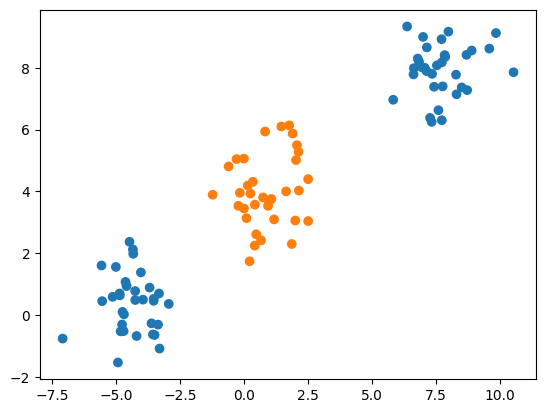

In [16]:
plt.scatter(X[:,0], X[:,1], c=plt.cm.tab10(y))

Now let us fit the data to `Polynomialfeatures` to create additional polinomial features. Check the shape of the data before and after the transformation.

In [17]:
from sklearn.preprocessing import PolynomialFeatures

In [18]:
poly = PolynomialFeatures (include_bias=False)

In [19]:
X_poly = poly.fit_transform(X)

In [20]:
X.shape

(100, 2)

In [21]:
X_poly.shape

(100, 5)

In [21]:
#x1 and x2 PolynomialFeatures

#x1 x2 x1^2 x2^2 x1*x2

#(x1x2)^2 = x1^2 + 2*x1*x2 + x2^2

#support vector machine

#we consider each data points as a vector
#all data points in my training dataset are vectors
#but only some of them will be relevant 
#in terms of seperating data into two regions

In [ ]:
#X_new = (x11, x21)
         
#Linear SVM, I will do the following:

# x11, x12, x11^2, x21^2, x11*x21 

# sign(0.13850605*x11 +  0.05989699*x12 + -0.20119627,  0.0484241 ,  0.01907115)


In [ ]:
#X_new = (x11, x21)
#sign(-0.02957404*(X_1*X_new) + (-0.00341814)*(X26*X_new) +  0.00254448,  0.03044769)

Fit `svc` with a linear kernel on the transformed dataset. Later, fit `svc` with a polynomial kernel on the original dataset. Check the coefficients, dual coefficients, and support for both linear and kernel svm models.

In [24]:
from sklearn.svm import SVC

In [25]:
linear_svm = SVC(kernel='linear').fit(X_poly,y)
ploy_svm = SVC(kernel='poly', degree=2, coef0=1).fit(X,y)

In [26]:
linear_svm.coef_

array([[ 0.13850605,  0.05989699, -0.20119627,  0.0484241 ,  0.01907115]])

In [29]:
linear_svm.dual_coef_

array([[-0.02957404, -0.00341814,  0.00254448,  0.03044769]])

In [28]:
linear_svm.support_

array([ 1, 26, 42, 62], dtype=int32)

## Example 2

In [58]:
from sklearn.model_selection import GridSearchCV, cross_val_score,train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_digits

Load digits dataset from scikitlearn using `load_digits()` function, create train and test datasets. Print the fitst eight digits on the screen.

**regularization coefficient alpha and C**

to reduce overfitting, we deliberately introduce a penalty to our optimization problem

Linera regression: (y-yhat)^2

Ridge Regression: min [ (y-yhat)^2 +  alpha * |w|^2 ]

Logistic Regression: min [ C * (y-yhat)^2 +  |w|^2 ]

SVM: [ C * (y-yhat)^2 +  |w|^2 ]

Create a pipeline using `StandardScaler` and `SVC`. Find the cross validation score for both nont-scaled and scaled datasets for SVC.

In [59]:
from sklearn.pipeline import make_pipeline

In [60]:
digits = load_digits()

In [61]:
X,y= digits.data, digits.target

In [62]:
X_train,X_test,y_train,y_test = train_test_split(X,y, stratify=y, random_state=0)

In [63]:
X.shape

(1797, 64)

In [64]:
X_train.shape

(1347, 64)

In [65]:
scaled_svc = make_pipeline(StandardScaler(), SVC())

In [66]:
scaled_svc


Pipeline(steps=[('standardscaler', StandardScaler()), ('svc', SVC())])

In [67]:
scores_1 = cross_val_score(SVC(), X_train, y_train, cv=10)

In [68]:
np.mean(scores_1), np.std(scores_1)

(0.9873742399115534, 0.009415655646660361)

In [69]:
scores_1

array([0.99259259, 1.        , 1.        , 0.97037037, 0.99259259,
       0.98518519, 0.97777778, 0.98507463, 0.99253731, 0.97761194])

In [70]:
scores_2 = cross_val_score(scaled_svc, X_train, y_train, cv=10)

In [71]:
scores_2

array([0.97037037, 0.99259259, 0.97777778, 0.96296296, 0.97777778,
       0.99259259, 0.96296296, 0.98507463, 0.98507463, 0.96268657])

In [72]:
np.mean(scores_2), np.std(scores_2)

(0.9769872857932558, 0.0112283948617752)

Create a grid search for `C` and `gamma` parameters of `SVC`. turn the grid search results in to a dataframe and check the results.

In [73]:
np.logspace(-3,2,6)

array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02])

In [74]:
X_train.shape[0]

1347

In [75]:
myparam_grid = {'svc__C': np.logspace(-3,2,6),
              'svc__gamma':np.logspace(-3,2,6)/X_train.shape[0]}

In [76]:
grid = GridSearchCV(scaled_svc, param_grid=myparam_grid, cv=10,
             return_train_score=True)

In [77]:
grid

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('svc', SVC())]),
             param_grid={'svc__C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'svc__gamma': array([7.42390497e-07, 7.42390497e-06, 7.42390497e-05, 7.42390497e-04,
       7.42390497e-03, 7.42390497e-02])},
             return_train_score=True)

In [78]:
grid.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('svc', SVC())]),
             param_grid={'svc__C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'svc__gamma': array([7.42390497e-07, 7.42390497e-06, 7.42390497e-05, 7.42390497e-04,
       7.42390497e-03, 7.42390497e-02])},
             return_train_score=True)

In [ ]:
#X_train

#X_train_1, X_train_2, ... ,X_train_10

#1. C= 0.001, gamma = 7.42e-7,
   
#   1.1 X_train_1 ---> validation, X_train_2, ... X_train_10 ---> train data set
#   1.2 X_train_2 ---> validation, X_train_3, ... X_train_10 ---> train data set
#   .
#   .
#   .
#  1.10 X_train_10 ---> validation, X_train_10, ... X_train_10 ---> train data set    

In [81]:
import pandas as pd
results = pd.DataFrame(grid.cv_results_)

In [83]:
results.T

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
mean_fit_time,0.156774,0.153201,0.189242,0.167562,0.153872,0.154252,0.20061,0.153621,0.152317,0.157224,...,0.106423,0.035531,0.039562,0.253828,0.226252,0.113401,0.047042,0.045435,0.068021,0.27262
std_fit_time,0.007767,0.004603,0.041673,0.02968,0.0052,0.003167,0.03833,0.00246,0.002047,0.006839,...,0.031399,0.000997,0.002621,0.127126,0.046167,0.020594,0.009748,0.009971,0.020041,0.064533
mean_score_time,0.017685,0.016615,0.022333,0.017684,0.016715,0.016384,0.023413,0.016583,0.016824,0.016805,...,0.018108,0.00841,0.008469,0.020273,0.027743,0.021539,0.011621,0.011095,0.016027,0.022121
std_score_time,0.002158,0.000535,0.005917,0.003411,0.000486,0.00031,0.005481,0.000754,0.001669,0.000879,...,0.00432,0.000243,0.000734,0.010528,0.009107,0.008222,0.002799,0.005376,0.006721,0.007339
param_svc__C,0.001,0.001,0.001,0.001,0.001,0.001,0.01,0.01,0.01,0.01,...,10.0,10.0,10.0,10.0,100.0,100.0,100.0,100.0,100.0,100.0
param_svc__gamma,0.000001,0.000007,0.000074,0.000742,0.007424,0.074239,0.000001,0.000007,0.000074,0.000742,...,0.000074,0.000742,0.007424,0.074239,0.000001,0.000007,0.000074,0.000742,0.007424,0.074239
params,"{'svc__C': 0.001, 'svc__gamma': 7.423904974016...","{'svc__C': 0.001, 'svc__gamma': 7.423904974016...","{'svc__C': 0.001, 'svc__gamma': 7.423904974016...","{'svc__C': 0.001, 'svc__gamma': 0.000742390497...","{'svc__C': 0.001, 'svc__gamma': 0.007423904974...","{'svc__C': 0.001, 'svc__gamma': 0.074239049740...","{'svc__C': 0.01, 'svc__gamma': 7.4239049740163...","{'svc__C': 0.01, 'svc__gamma': 7.4239049740163...","{'svc__C': 0.01, 'svc__gamma': 7.4239049740163...","{'svc__C': 0.01, 'svc__gamma': 0.0007423904974...",...,"{'svc__C': 10.0, 'svc__gamma': 7.4239049740163...","{'svc__C': 10.0, 'svc__gamma': 0.0007423904974...","{'svc__C': 10.0, 'svc__gamma': 0.0074239049740...","{'svc__C': 10.0, 'svc__gamma': 0.0742390497401...","{'svc__C': 100.0, 'svc__gamma': 7.423904974016...","{'svc__C': 100.0, 'svc__gamma': 7.423904974016...","{'svc__C': 100.0, 'svc__gamma': 7.423904974016...","{'svc__C': 100.0, 'svc__gamma': 0.000742390497...","{'svc__C': 100.0, 'svc__gamma': 0.007423904974...","{'svc__C': 100.0, 'svc__gamma': 0.074239049740..."
split0_test_score,0.377778,0.377778,0.377778,0.377778,0.385185,0.296296,0.377778,0.377778,0.377778,0.377778,...,0.925926,0.977778,0.97037,0.955556,0.414815,0.925926,0.985185,0.97037,0.97037,0.955556
split1_test_score,0.096296,0.096296,0.096296,0.096296,0.096296,0.096296,0.096296,0.096296,0.096296,0.096296,...,0.962963,0.985185,0.985185,0.992593,0.37037,0.962963,0.985185,0.992593,0.985185,0.992593
split2_test_score,0.096296,0.096296,0.096296,0.096296,0.096296,0.096296,0.096296,0.096296,0.096296,0.096296,...,0.948148,0.985185,0.985185,0.955556,0.311111,0.940741,0.992593,0.985185,0.977778,0.955556


In [89]:
col = pd.DataFrame(results.columns)
col.head()

,0
0,mean_fit_time
1,std_fit_time
2,mean_score_time
3,std_score_time
4,param_svc__C


In [90]:
results.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_svc__C', 'param_svc__gamma', 'params', 'split0_test_score',
       'split1_test_score', 'split2_test_score', 'split3_test_score',
       'split4_test_score', 'split5_test_score', 'split6_test_score',
       'split7_test_score', 'split8_test_score', 'split9_test_score',
       'mean_test_score', 'std_test_score', 'rank_test_score',
       'split0_train_score', 'split1_train_score', 'split2_train_score',
       'split3_train_score', 'split4_train_score', 'split5_train_score',
       'split6_train_score', 'split7_train_score', 'split8_train_score',
       'split9_train_score', 'mean_train_score', 'std_train_score'],
      dtype='object')

In [96]:
results.mean_test_score

0     0.214782
1     0.214782
2     0.216263
3     0.217004
4     0.222195
5     0.190221
6     0.214782
7     0.214782
8     0.216263
9     0.217004
10    0.222195
11    0.190221
12    0.214782
13    0.214782
14    0.216263
15    0.323709
16    0.930967
17    0.723062
18    0.214782
19    0.214782
20    0.402399
21    0.934671
22    0.979215
23    0.962117
24    0.214782
25    0.414284
26    0.936147
27    0.977739
28    0.982178
29    0.960636
30    0.414284
31    0.935406
32    0.978474
33    0.980708
34    0.981437
35    0.960636
Name: mean_test_score, dtype: float64

In [95]:
results.mean_test_score.values

array([0.21478165, 0.21478165, 0.21626313, 0.21700387, 0.22219458,
       0.19022112, 0.21478165, 0.21478165, 0.21626313, 0.21700387,
       0.22219458, 0.19022112, 0.21478165, 0.21478165, 0.21626313,
       0.32370923, 0.93096739, 0.72306247, 0.21478165, 0.21478165,
       0.40239912, 0.93467109, 0.97921504, 0.96211719, 0.21478165,
       0.41428413, 0.93614704, 0.97773908, 0.982178  , 0.96063571,
       0.41428413, 0.9354063 , 0.9784743 , 0.98070757, 0.98143726,
       0.96063571])

In [98]:
results.mean_test_score.values.reshape(6,6)

array([[0.21478165, 0.21478165, 0.21626313, 0.21700387, 0.22219458,
        0.19022112],
       [0.21478165, 0.21478165, 0.21626313, 0.21700387, 0.22219458,
        0.19022112],
       [0.21478165, 0.21478165, 0.21626313, 0.32370923, 0.93096739,
        0.72306247],
       [0.21478165, 0.21478165, 0.40239912, 0.93467109, 0.97921504,
        0.96211719],
       [0.21478165, 0.41428413, 0.93614704, 0.97773908, 0.982178  ,
        0.96063571],
       [0.41428413, 0.9354063 , 0.9784743 , 0.98070757, 0.98143726,
        0.96063571]])

In [94]:
len(results.mean_test_score)

36

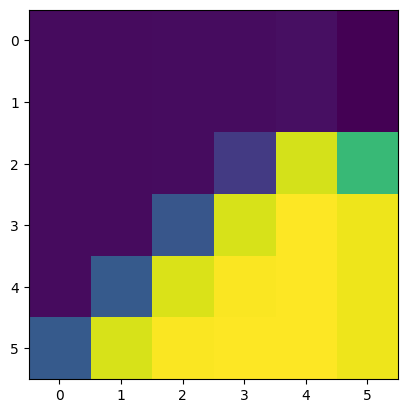

In [99]:
plt.imshow(results.mean_test_score.values.reshape(6,6))

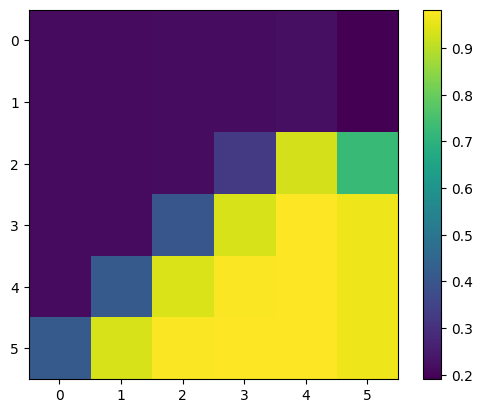

In [101]:
plt.imshow(results.mean_test_score.values.reshape(6,6))
plt.colorbar()